In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [ ]:
df = pd.read_csv("../data//raw/Loan_default.csv")

In [7]:
df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
identifier = ["LoanID"]

numerical_continuous = [
    "Age",
    "Income",
    "LoanAmount",
    "CreditScore",
    "InterestRate",
    "DTIRatio",
    "MonthsEmployed"
]


categorical_nominal = [
    "EmploymentType",
    "MaritalStatus",
    "LoanPurpose",
    "NumCreditLines",
    "LoanTerm"
]

categorical_binary = [
    "HasMortgage",
    "HasDependents",
    "HasCoSigner"
]

ordinal = ["Education"]  


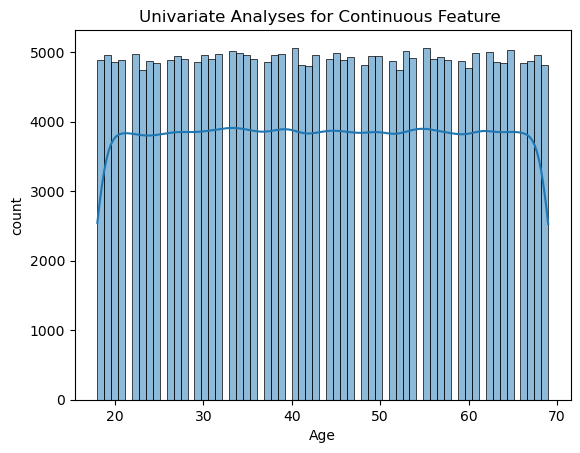

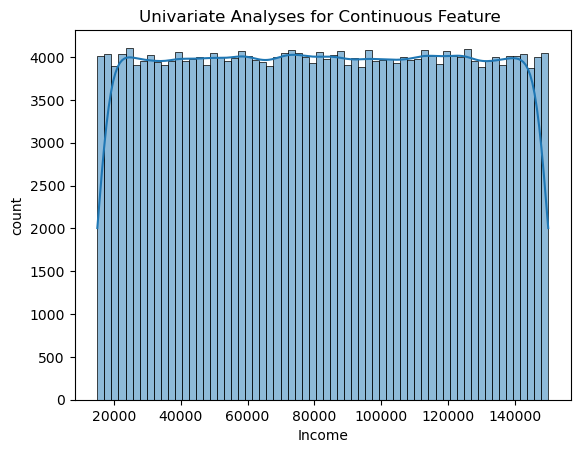

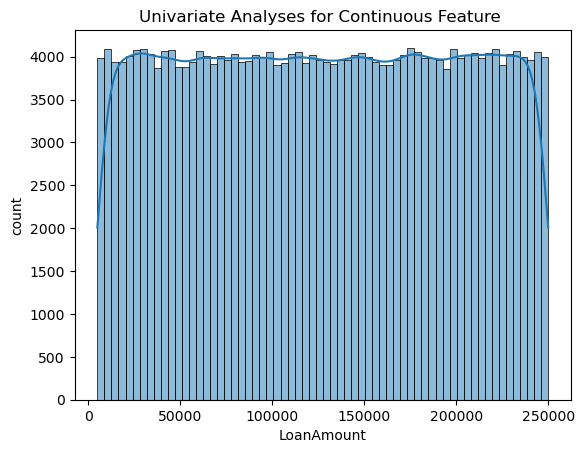

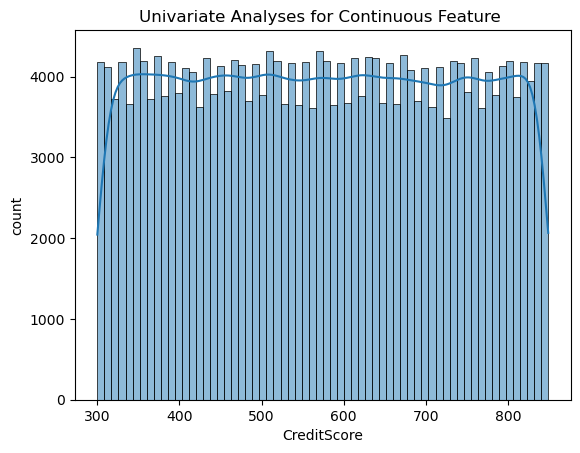

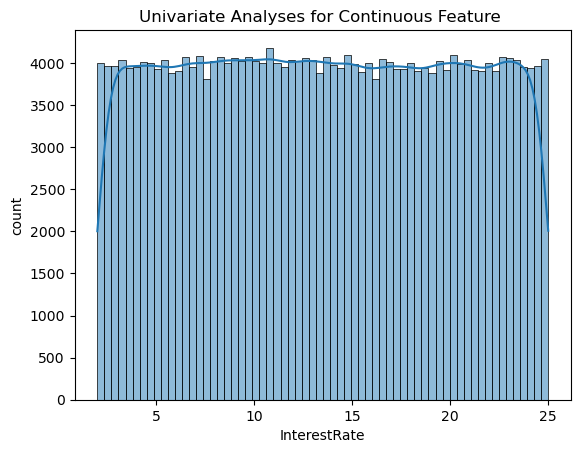

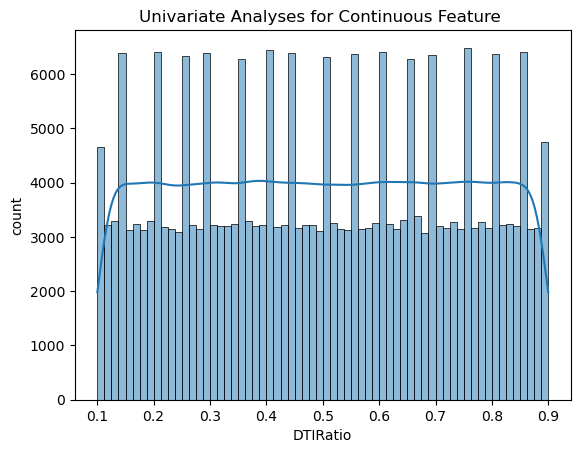

In [22]:
for col in numerical_continuous:
    sns.histplot(df[col], kde = True)
    plt.title("Univariate Analyses for Continuous Feature ")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()


In [23]:
for col in numerical_continuous:
    print(f"{col} : {df[col].skew()}")

Age : 0.0006978543690462524
Income : -0.00038051328464016167
LoanAmount : -0.0018272468470878597
CreditScore : 0.004688186338493831
InterestRate : 0.004607890923307074
DTIRatio : -0.001498963370252565


In [24]:
for col in numerical_continuous:
    print(f"{col} : {df[col].kurtosis()}")

Age : -1.1984306327090095
Income : -1.198360926931816
LoanAmount : -1.2036798812613259
CreditScore : -1.200301814502096
InterestRate : -1.1971672237742688
DTIRatio : -1.199674818304813


In [28]:
for col in numerical_continuous:
    stat, p = shapiro(df[col])
    print(f" {stat},{p} : {col}")

 0.9542751862104975,2.2723942795249617e-109 : Age
 0.9550816109910821,6.949883370852507e-109 : Income
 0.9545131427648493,3.1547051508184633e-109 : LoanAmount
 0.9547851210126683,4.598361930986622e-109 : CreditScore
 0.9551836292700525,8.015615033715019e-109 : InterestRate
 0.9548767219864253,5.222894311811096e-109 : DTIRatio


In [31]:
df[numerical_discrete].describe()
df[numerical_discrete].mode()

,MonthsEmployed,NumCreditLines,LoanTerm
0,56,2,48


In [38]:
for col in numerical_discrete:
    print(df[col].value_counts(normalize = True)*100)


MonthsEmployed
56     0.872147
26     0.870580
45     0.869405
107    0.864314
79     0.860789
         ...   
11     0.800088
39     0.799304
21     0.788731
99     0.786381
25     0.784814
Name: proportion, Length: 120, dtype: float64
NumCreditLines
2    25.114844
3    24.998923
4    24.996965
1    24.889268
Name: proportion, dtype: float64
LoanTerm
48    20.037831
60    20.033131
36    19.996710
24    19.976346
12    19.955981
Name: proportion, dtype: float64


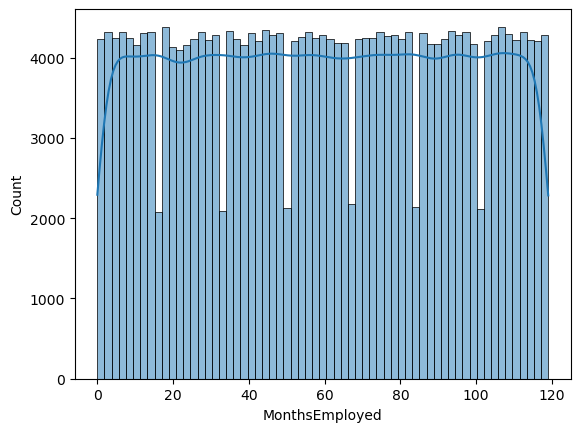

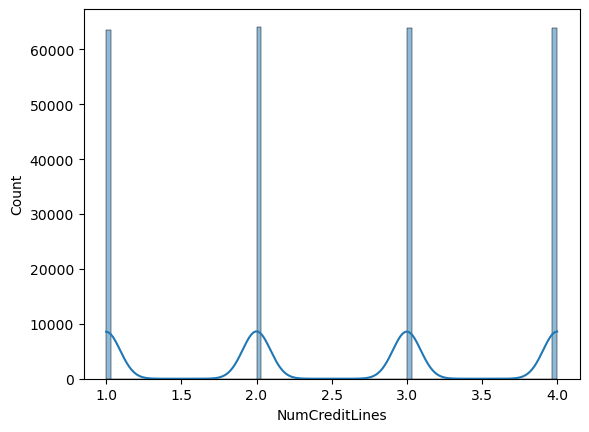

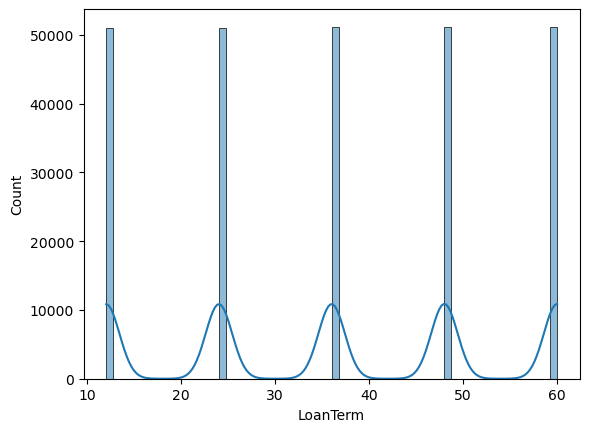

In [39]:
for col in numerical_discrete:
    sns.histplot(df[col], kde = True)
    plt.show()

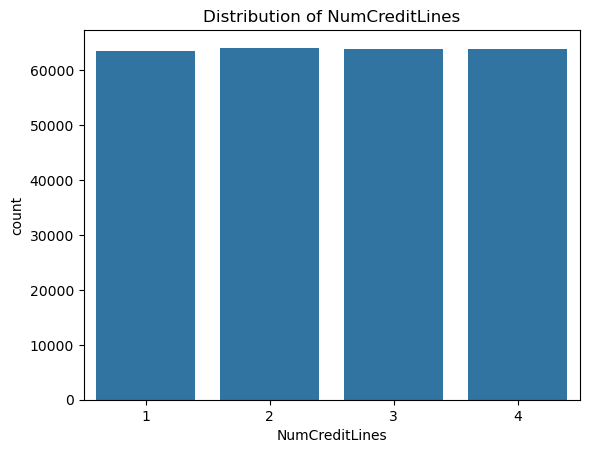

In [40]:
sns.countplot(x="NumCreditLines", data=df)
plt.title("Distribution of NumCreditLines")
plt.show()


In [46]:
for col in categorical_nominal:
    print(f"{col} : {df[col].value_counts()/len(df)*100})")
    print("="*50)

EmploymentType : EmploymentType
Part-time        25.126984
Unemployed       24.995007
Self-employed    24.948795
Full-time        24.929214
Name: count, dtype: float64)
MaritalStatus : MaritalStatus
Married     33.406306
Divorced    33.300959
Single      33.292735
Name: count, dtype: float64)
LoanPurpose : LoanPurpose
Business     20.089525
Home         20.084826
Education    19.974779
Other        19.939142
Auto         19.911728
Name: count, dtype: float64)


In [47]:
for col in categorical_binary:
    print(f"{col} : {df[col].value_counts()/len(df)*100})")
    print("="*50)

HasMortgage : HasMortgage
Yes    50.001371
No     49.998629
Name: count, dtype: float64)
HasDependents : HasDependents
Yes    50.026826
No     49.973174
Name: count, dtype: float64)
HasCoSigner : HasCoSigner
Yes    50.01077
No     49.98923
Name: count, dtype: float64)
Default : Default
0    88.387175
1    11.612825
Name: count, dtype: float64)


In [51]:
df["MonthsEmployed"].value_counts()

MonthsEmployed
56     2227
26     2223
45     2220
107    2207
79     2198
       ... 
11     2043
39     2041
21     2014
99     2008
25     2004
Name: count, Length: 120, dtype: int64

<Axes: xlabel='MonthsEmployed', ylabel='Count'>

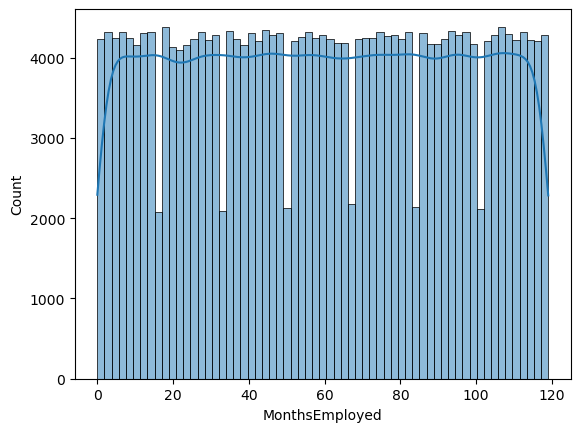

In [52]:
sns.histplot(df["MonthsEmployed"], kde = True)